Import libraries

In [24]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import plotly.express as px
import plotly.graph_objects as go
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# PH0100

Uncalibrated Pressure

Epoch 1/100
658/658 [==============================] - 2s 2ms/step - loss: 0.5714 - mean_absolute_error: 0.5714 - mean_squared_error: 1.7729 - val_loss: 0.4162 - val_mean_absolute_error: 0.4162 - val_mean_squared_error: 0.7404
Epoch 2/100
658/658 [==============================] - 1s 1ms/step - loss: 0.4268 - mean_absolute_error: 0.4268 - mean_squared_error: 0.8062 - val_loss: 0.4168 - val_mean_absolute_error: 0.4168 - val_mean_squared_error: 0.7495
Epoch 3/100
658/658 [==============================] - 1s 1ms/step - loss: 0.4261 - mean_absolute_error: 0.4261 - mean_squared_error: 0.8059 - val_loss: 0.4135 - val_mean_absolute_error: 0.4135 - val_mean_squared_error: 0.7395
Epoch 4/100
658/658 [==============================] - 1s 1ms/step - loss: 0.4247 - mean_absolute_error: 0.4247 - mean_squared_error: 0.7933 - val_loss: 0.4148 - val_mean_absolute_error: 0.4148 - val_mean_squared_error: 0.7346
Epoch 5/100
658/658 [==============================] - 1s 1ms/step - loss: 0.4237 - mean_abs

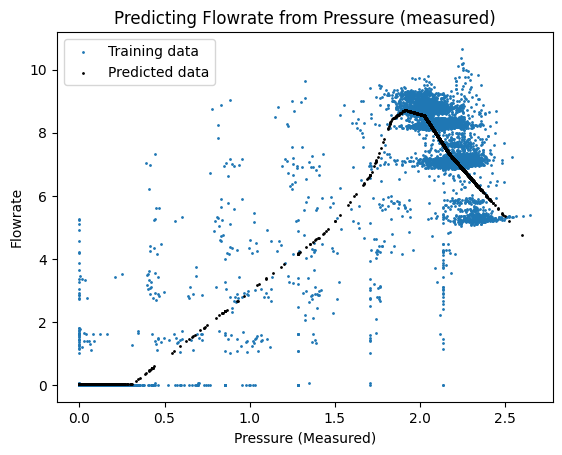

In [25]:
# Reading the dataset
#read the data from the excel file
df = pd.read_excel('/content/Ph0100(preprocessed_smooth_5).xlsx')
# Select only the columns that we want to use: Pressure_ground_truth, Pressure, and Flowrate
df = df[['Pressure', 'Flowrate','Pressure_ground_truth']]

df_binary = df[['Flowrate', 'Pressure']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['Pressure']).reshape(-1, 1)
y = np.array(df_binary['Flowrate']).reshape(-1, 1)

# remove NaN values
df_binary.dropna(inplace = True)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Drop NaN values from X_train and y_train, x_test and y_test
X_train = X_train[~np.isnan(X_train).any(axis=1)]
y_train = y_train[~np.isnan(y_train).any(axis=1)]
X_test = X_test[~np.isnan(X_test).any(axis=1)]
y_test = y_test[~np.isnan(y_test).any(axis=1)]

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
y_pred = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
plt.scatter(X_train, y_train,s=1)
plt.scatter(X_test, y_pred,color='k',s=1)
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure (Measured)')
plt.ylabel('Flowrate')
# title
plt.title('Predicting Flowrate from Pressure (measured)')

# Score of CNN
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)

Calibration

Score:  0.984391480866753
Error:  0.13287807698813167


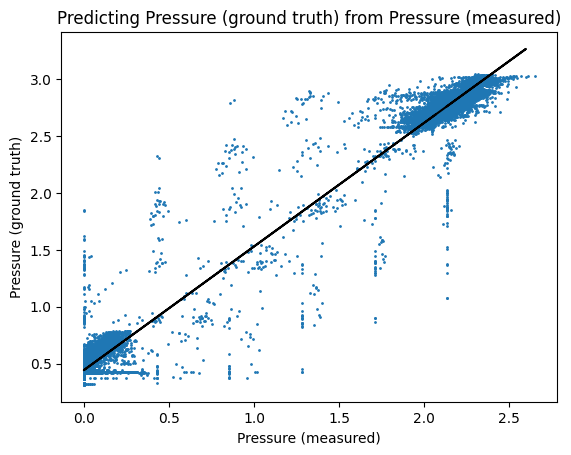

In [26]:
df_binary = df[['Pressure_ground_truth', 'Pressure']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['Pressure']).reshape(-1, 1)
y = np.array(df_binary['Pressure_ground_truth']).reshape(-1, 1)

# remove NaN values
df_binary.dropna(inplace = True)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Drop NaN values from X_train and y_train, x_test and y_test
X_train = X_train[~np.isnan(X_train).any(axis=1)]
y_train = y_train[~np.isnan(y_train).any(axis=1)]
X_test = X_test[~np.isnan(X_test).any(axis=1)]
y_test = y_test[~np.isnan(y_test).any(axis=1)]

regr1 = LinearRegression()
regr1.fit(X_train, y_train)
print("Score: ", regr1.score(X_test, y_test))
y_pred = regr1.predict(X_test)
err = mean_squared_error(y_test, y_pred)**0.5
print("Error: ", err)
plt.scatter(X,y,s=1)
plt.plot(X_test, y_pred,color='k')
plt.title('Predicting Pressure (ground truth) from Pressure (measured)')
plt.xlabel('Pressure (measured)')
plt.ylabel('Pressure (ground truth)')
plt.show()

Calibrated

Epoch 1/100
658/658 [==============================] - 1s 1ms/step - loss: 0.6086 - mean_absolute_error: 0.6086 - mean_squared_error: 1.8369 - val_loss: 0.4462 - val_mean_absolute_error: 0.4462 - val_mean_squared_error: 0.7593
Epoch 2/100
658/658 [==============================] - 1s 1ms/step - loss: 0.4576 - mean_absolute_error: 0.4576 - mean_squared_error: 0.7765 - val_loss: 0.4330 - val_mean_absolute_error: 0.4330 - val_mean_squared_error: 0.7173
Epoch 3/100
658/658 [==============================] - 1s 1ms/step - loss: 0.4474 - mean_absolute_error: 0.4474 - mean_squared_error: 0.7698 - val_loss: 0.4303 - val_mean_absolute_error: 0.4303 - val_mean_squared_error: 0.7858
Epoch 4/100
658/658 [==============================] - 1s 1ms/step - loss: 0.4373 - mean_absolute_error: 0.4373 - mean_squared_error: 0.7658 - val_loss: 0.4131 - val_mean_absolute_error: 0.4131 - val_mean_squared_error: 0.7337
Epoch 5/100
658/658 [==============================] - 1s 1ms/step - loss: 0.4249 - mean_abs

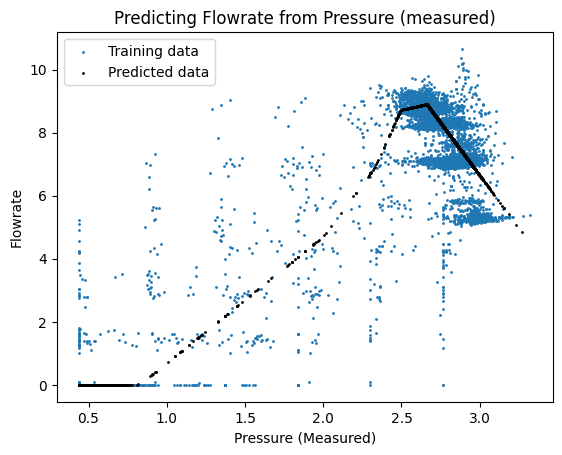

In [27]:
# applying calibration using the linear regression model regr1
df['Pressure_calibrated'] = regr1.predict(np.array(df['Pressure']).reshape(-1, 1))
# train new model to predict flowrate using calibrated pressure
df_binary = df[['Flowrate', 'Pressure_calibrated']]
df_binary = df_binary.sample(frac=1)
df_binary.head()
X = np.array(df_binary['Pressure_calibrated']).reshape(-1, 1)
y = np.array(df_binary['Flowrate']).reshape(-1, 1)

# remove NaN values
df_binary.dropna(inplace = True)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Drop NaN values from X_train and y_train, x_test and y_test
X_train = X_train[~np.isnan(X_train).any(axis=1)]
y_train = y_train[~np.isnan(y_train).any(axis=1)]
X_test = X_test[~np.isnan(X_test).any(axis=1)]
y_test = y_test[~np.isnan(y_test).any(axis=1)]

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
y_pred = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
plt.scatter(X_train, y_train,s=1)
plt.scatter(X_test, y_pred,color='k',s=1)
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure (Measured)')
plt.ylabel('Flowrate')
# title
plt.title('Predicting Flowrate from Pressure (measured)')

# Score of CNN
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)

# PH0302

Epoch 1/100
666/666 [==============================] - 1s 1ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_squared_error: 0.3552 - val_loss: 0.0360 - val_mean_absolute_error: 0.0360 - val_mean_squared_error: 0.0850
Epoch 2/100
666/666 [==============================] - 1s 1ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_squared_error: 0.0704 - val_loss: 0.0360 - val_mean_absolute_error: 0.0360 - val_mean_squared_error: 0.0827
Epoch 3/100
666/666 [==============================] - 1s 1ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_squared_error: 0.0692 - val_loss: 0.0371 - val_mean_absolute_error: 0.0371 - val_mean_squared_error: 0.0817
Epoch 4/100
666/666 [==============================] - 1s 1ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_squared_error: 0.0705 - val_loss: 0.0367 - val_mean_absolute_error: 0.0367 - val_mean_squared_error: 0.0853
Epoch 5/100
666/666 [==============================] - 1s 1ms/step - loss: 0.0369 - mean_abs

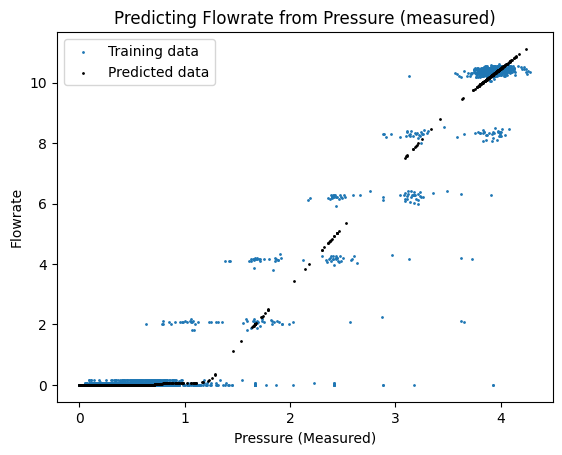

In [28]:
# Reading the dataset
#read the data from the excel file
df = pd.read_excel('/content/Ph0302(preprocessed_smooth_5).xlsx')
# Select only the columns that we want to use: Pressure_ground_truth, Pressure, and Flowrate
df = df[['Pressure', 'Flowrate']]

df_binary = df[['Flowrate', 'Pressure']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['Pressure']).reshape(-1, 1)
y = np.array(df_binary['Flowrate']).reshape(-1, 1)

# remove NaN values
df_binary.dropna(inplace = True)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Drop NaN values from X_train and y_train, x_test and y_test
X_train = X_train[~np.isnan(X_train).any(axis=1)]
y_train = y_train[~np.isnan(y_train).any(axis=1)]
X_test = X_test[~np.isnan(X_test).any(axis=1)]
y_test = y_test[~np.isnan(y_test).any(axis=1)]

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
y_pred = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
plt.scatter(X_train, y_train,s=1)
plt.scatter(X_test, y_pred,color='k',s=1)
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure (Measured)')
plt.ylabel('Flowrate')
# title
plt.title('Predicting Flowrate from Pressure (measured)')

# Score of CNN
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)

# PH0303

Epoch 1/100
656/656 [==============================] - 1s 1ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_squared_error: 0.3051 - val_loss: 0.0543 - val_mean_absolute_error: 0.0543 - val_mean_squared_error: 0.0847
Epoch 2/100
656/656 [==============================] - 1s 1ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_squared_error: 0.0735 - val_loss: 0.0527 - val_mean_absolute_error: 0.0527 - val_mean_squared_error: 0.0828
Epoch 3/100
656/656 [==============================] - 1s 1ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_squared_error: 0.0727 - val_loss: 0.0531 - val_mean_absolute_error: 0.0531 - val_mean_squared_error: 0.0822
Epoch 4/100
656/656 [==============================] - 1s 1ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_squared_error: 0.0731 - val_loss: 0.0550 - val_mean_absolute_error: 0.0550 - val_mean_squared_error: 0.0847
Epoch 5/100
656/656 [==============================] - 1s 1ms/step - loss: 0.0493 - mean_abs

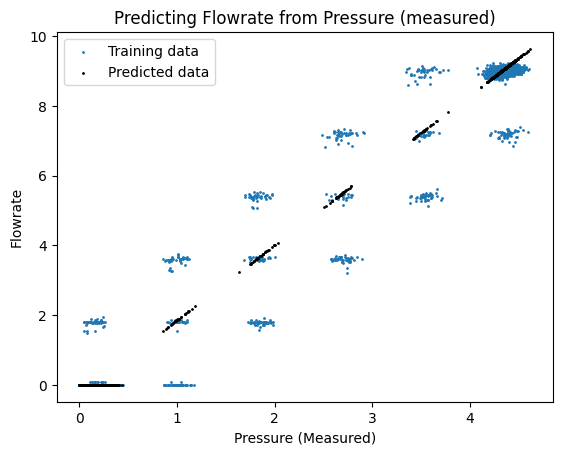

In [29]:
# Reading the dataset
#read the data from the excel file
df = pd.read_excel('/content/Ph0303(preprocessed_smooth_5).xlsx')
# Select only the columns that we want to use: Pressure_ground_truth, Pressure, and Flowrate
df = df[['Pressure', 'Flowrate']]

df_binary = df[['Flowrate', 'Pressure']]
df_binary = df_binary.sample(frac=1)

X = np.array(df_binary['Pressure']).reshape(-1, 1)
y = np.array(df_binary['Flowrate']).reshape(-1, 1)

# remove NaN values
df_binary.dropna(inplace = True)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Drop NaN values from X_train and y_train, x_test and y_test
X_train = X_train[~np.isnan(X_train).any(axis=1)]
y_train = y_train[~np.isnan(y_train).any(axis=1)]
X_test = X_test[~np.isnan(X_test).any(axis=1)]
y_test = y_test[~np.isnan(y_test).any(axis=1)]

# CNN
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_absolute_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=100)

# Predictions
y_pred = model.predict(X_test).flatten()

# Plotting the predictions
fig = plt.figure()
plt.scatter(X_train, y_train,s=1)
plt.scatter(X_test, y_pred,color='k',s=1)
# legend
plt.legend(['Training data', 'Predicted data'])
# axis labels
plt.xlabel('Pressure (Measured)')
plt.ylabel('Flowrate')
# title
plt.title('Predicting Flowrate from Pressure (measured)')

# Score of CNN
from sklearn.metrics import r2_score
print('Accuracy: ', r2_score(y_test, y_pred))

# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rms)